## 引入python库

In [1]:
import copy
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
import os

## 生成数据集，初始化权重w和偏置b

In [2]:
#training_set = [[(3,3),1],[(4,3),1],[(1,1),-1]]
training_set = [[(3,3),1],[(4,3),1],[(2,2),1],[(1,1),-1],[(0.5,0.5),-1],[(0.2,2),-1]]
w = [0, 0]
b = 0
history = []

## 定义参数更新函数

In [3]:
def update(item):
    #使用梯度下降法更新参数w和b
    #:param item: 一个被错误分类的点
    #:return: 无
    
    global w,b, history   #定义全局变量，便于在函数内部访问
    w[0] += 1*item[1] * item[0][0]
    w[1] += 1*item[1] * item[0][1]
    b += 1* item[1]
    print('update  {0}   {1}'.format(w,b))
    history.append([copy.copy(w),b])

## 计算实例点到超平面距离

In [4]:
def distance(item):
    #计算点item到超平面的距离并输出
    #:param item:根据距离判断是否被误分类了
    #:return:距离
    
    print('calculate {0}'.format(item))
    res = 0
    for i in range(len(item[0])):
        res += item[0][i] * w[i]
    res += b
    res *= item[1]
    return res

## 检查超平面是否能完全正确分类所有实例

In [5]:
def check():
    #检查超平面是否能完全区分所有的实例点
    #：return: 返回flag
    flag = False
    #遍历每一个点，直到找到一个误分类点
    for item in training_set:
        if distance(item) <=0:  #如果是误分类点
            flag = True
            update(item)
    if not flag:
        print('result: w:' + str(w)+'b:'+str(b)) #若无误分类，则输出最终的w,b
    return flag

## 定义主函数，训练感知器并显示生成动画

calculate [(3, 3), 1]
update  [3, 3]   1
calculate [(4, 3), 1]
calculate [(2, 2), 1]
calculate [(1, 1), -1]
update  [2, 2]   0
calculate [(0.5, 0.5), -1]
update  [1.5, 1.5]   -1
calculate [(0.2, 2), -1]
update  [1.3, -0.5]   -2
calculate [(3, 3), 1]
calculate [(4, 3), 1]
calculate [(2, 2), 1]
update  [3.3, 1.5]   -1
calculate [(1, 1), -1]
update  [2.3, 0.5]   -2
calculate [(0.5, 0.5), -1]
calculate [(0.2, 2), -1]
calculate [(3, 3), 1]
calculate [(4, 3), 1]
calculate [(2, 2), 1]
calculate [(1, 1), -1]
update  [1.2999999999999998, -0.5]   -3
calculate [(0.5, 0.5), -1]
calculate [(0.2, 2), -1]
calculate [(3, 3), 1]
update  [4.3, 2.5]   -2
calculate [(4, 3), 1]
calculate [(2, 2), 1]
calculate [(1, 1), -1]
update  [3.3, 1.5]   -3
calculate [(0.5, 0.5), -1]
calculate [(0.2, 2), -1]
update  [3.0999999999999996, -0.5]   -4
calculate [(3, 3), 1]
calculate [(4, 3), 1]
calculate [(2, 2), 1]
calculate [(1, 1), -1]
calculate [(0.5, 0.5), -1]
calculate [(0.2, 2), -1]
result: w:[3.0999999999999996, -

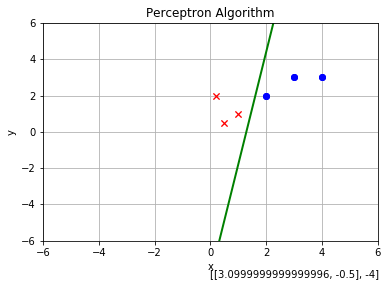

In [6]:
if __name__ == '__main__':
    epoches = 1000
    for i in range(epoches):
        if not check():break #如果已经没有误分类点，停止迭代
    
    #下面通过matplotlib显示算法过程
    fig = plt.figure()  #要显示的图像
    ax = plt.axes(xlim=(0,2),ylim=(-2,2)) #画坐标轴
    line, = ax.plot(0,0,color='green',linewidth=2)
    label = ax.text(0,0,'')
    
    #动画初始函数
    def init():
        line.set_data(0,0)
        x,y,x_,y_ = [],[],[],[]
        for p in training_set:
            if p[1] > 0:
                x.append(p[0][0])
                y.append(p[0][1])
            else:
                x_.append(p[0][0])
                y_.append(p[0][1])
        plt.plot(x,y,'bo',x_,y_,'rx')
        plt.axis([-6,6,-6,6])
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Perceptron Algorithm')
        
        return line,label
    #动画函数
    def animate(i):
        global history, ax,line,label
        w = history[i][0]
        b = history[i][1]
        if w[1]==0:return line,label
        x1 = -7
        y1 = -(b+w[0]*x1)/w[1]
        x2 = 7
        y2 = -(b+w[0]*x2)/w[1]
        line.set_data([x1,x2],[y1,y2])
        x1 = 0
        y1 = -(b+w[0]*x1)/w[1]
        label.set_text(history[i])
        label.set_position((x1,y1))
       
        return line, label
    anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(history),interval=epoches,repeat=True,blit=True)
    anim.save('perceptron.gif',writer='pillow')

## 定义预测函数,用于新实例点的分类预测

In [7]:
import numpy as np

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

print('w: '+str(w)+'b: '+str(b))
def predict(x):
    x_dot=np.dot(x,w)+b
    pred_y = sign(x_dot)
    print("预测类别：%d" % pred_y)
    
new_x = [(4,2),(0,0),(1,3),(3,3)]
for i in range(len(new_x)):
    predict((new_x[i][0],new_x[i][1]))

w: [3.0999999999999996, -0.5]b: -4
预测类别：1
预测类别：-1
预测类别：-1
预测类别：1
